<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week2%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C2_%E3%83%80%E3%83%9F%E3%83%BC%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week2授業前課題2 ダミーデータの作成
## 1. 課題の目的
* 数式演算ライブラリのNumPyに慣れる
* グラフの表示に慣れる




## 2. やること
###**ダミーデータの作成**
機械学習に関する実験で使われるダミーデータを作成してみる。<br>
・理想<br>
<img alt="Wheat and chessboard problem" src="https://t.gyazo.com/teams/diveintocode/29840c67d7aabcd16c3dd5325819ec65.png">

___
###問題1　乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してみる。

$$
        \left[\begin{array}{c}
            1.0 \quad 0.8 \\
            0.8 \quad 1.0 \\
        \end{array}\right] \quad
$$


In [ ]:
import numpy as np

mean = np.array([-3, 0])
cov = np.array([
                [1.0, 0.8],
                [0.8, 1.0],
                ])
np.random.seed(0)
random_data = np.random.multivariate_normal(mean, cov, size=500)
np.shape(random_data)

(500, 2)

___
### 問題2　散布図による可視化

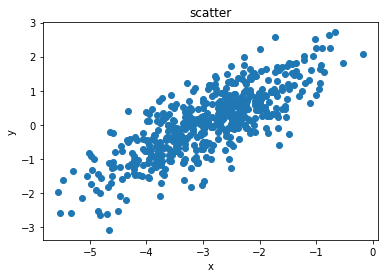

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = random_data[:,0]    # random_dataの0列目をx軸とする
y = random_data[:,1]    # random_dataの1列目をy軸とする

plt.title("scatter")
plt.xlabel("x")
plt.ylabel('y')
plt.scatter(x, y)   # scatter(x, y)で横軸x,縦軸yの散布図ができる
plt.show()

___
### 問題3　ヒストグラムによる可視化
問題1で作成したデータをヒストグラムで可視化してみる。

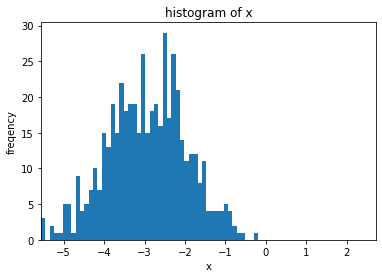

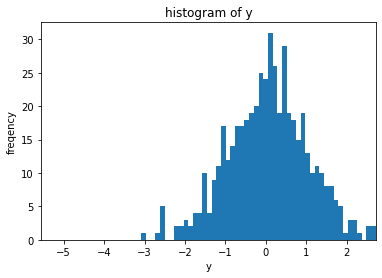

In [66]:
# x軸を指定する
# x軸の最小値と最大値はそれぞれ配列内の最小値、最大値とする
axis_x_min = np.amin([x, y])
axis_y_min = np.amax([x, y])

plt.xlim(axis_x_min, axis_y_min)  # xlim(a, b) a〜bまでをx軸の範囲にする
plt.title('histogram of x')
plt.xlabel('x')
plt.ylabel('freqency')
plt.hist(x, 50)  # 棒の数はとりあえず50個
plt.show()

plt.xlim(axis_x_min, axis_y_min)
plt.title('histogram of y')
plt.xlabel('y')
plt.ylabel('freqency')
plt.hist(y, 50)
plt.show()

___
### 問題4　データの追加
新たに平均が(0, -3)、共分散行列(問題1と同じ)で表される2次元正規分布による乱数を500個作成してみる。<br>
そして、問題1のグラフと合わせて一つの散布図として可視化する。（どっちがどっちのグラフかわかるように、問題1を0、問題4を1とした凡例（はんれい）を追加する）

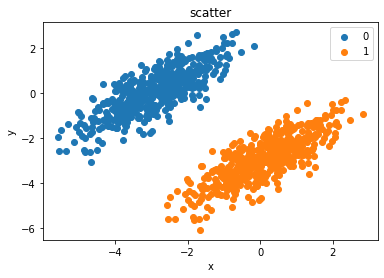

In [68]:
mean2 = np.array([0, -3])
cov2 = np.array([
                [1.0, 0.8],
                [0.8, 1.0],
                ])
np.random.seed(0)
random_data2 = np.random.multivariate_normal(mean2, cov2, size=500)

x2 = random_data2[:,0]    
y2 = random_data2[:,1]    

plt.title("scatter")
plt.xlabel("x")
plt.ylabel('y')
plt.scatter(x, y, label='0')    # label="" 凡例の名前を指定
plt.scatter(x2, y2, label='1')
plt.legend()    # 凡例を反映
plt.show()

___
### 問題5データの結合
二つのグラフを結合してみる。

In [ ]:
# np.vstack([a1, a2])   配列a1とa2を縦に結合
# np.concatenate([a1, a2], 0) と同等
combination_random_data = np.vstack([random_data, random_data2])
np.shape(combination_random_data)

(1000, 2)

___
### 問題6　ラベル付け
結合しただけだと、どちらのデータなのか見分けがつかないため、問題1のデータには0、問題4のデータには1のラベル付けをする。<br>
→要素が0の配列(500, 1)と要素が1の配列(500, 1)を縦に結合(1000, 1)。そのデータを問題5で結合したデータに追加し、(1000, 3)の配列にする。

In [69]:
label_0 = np.zeros((500, 1))    # np.zero((a, b))   全ての要素が0のa行b列の配列が返る
label_1 = np.ones((500, 1))     # np.ones((a, b))   全ての要素が1のa行b列の配列が返る
all_label = np.block([[label_0], [label_1]])    # np.block([])  複数の配列を直感的に結合できる

# 乱数データとラベルデータを結合
labeled_random_data = np.block([combination_random_data, all_label])   

# ラベルの位置に異常がないか確認
print(labeled_random_data[:5], '\n')
print(labeled_random_data[499:501], '\n')
print(labeled_random_data[995:])

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 [-3.85346966 -0.94919637  0.        ]
 [-3.03192065  0.22776465  0.        ]] 

[[-1.79803505  0.97547372  0.        ]
 [-1.80006782 -4.54698618  1.        ]] 

[[-0.47493982 -3.36186128  1.        ]
 [ 0.68225498 -2.16545763  1.        ]
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]


___
## 感想
一通り完成はしたが、正規分布すらまともに知らないため、理解できたか怪しい。<br>
問題1にある、「平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数」という文章の意味するところが全然理解できなかった。<br>
いよいよ数学の知識が必要になってきたので空いた時間を見つけて勉強したいと思った。<br>
配列の結合の操作が、np.block()を使えば意外と簡単だと思った。